In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data=pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


There are several Duplicate value lies in our dataset which is matches most of the rows.

# EDA

In [9]:
train_data['journey_day']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [10]:
train_data['journey_month']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [11]:
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [12]:
train_data['Arrival_mintue']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [13]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [14]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Arrival_hour,Arrival_mintue
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,13,15


In [15]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_hour,Arrival_mintue
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,3897,24,3,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,5,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,13882,9,6,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,1,3,21,35


In [17]:
train_data['journey_year']=pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [18]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_hour,Arrival_mintue,journey_year
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,3897,24,3,1,10,3
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,5,13,15,5
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,13882,9,6,4,25,6
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,5,23,30,5
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,1,3,21,35,3


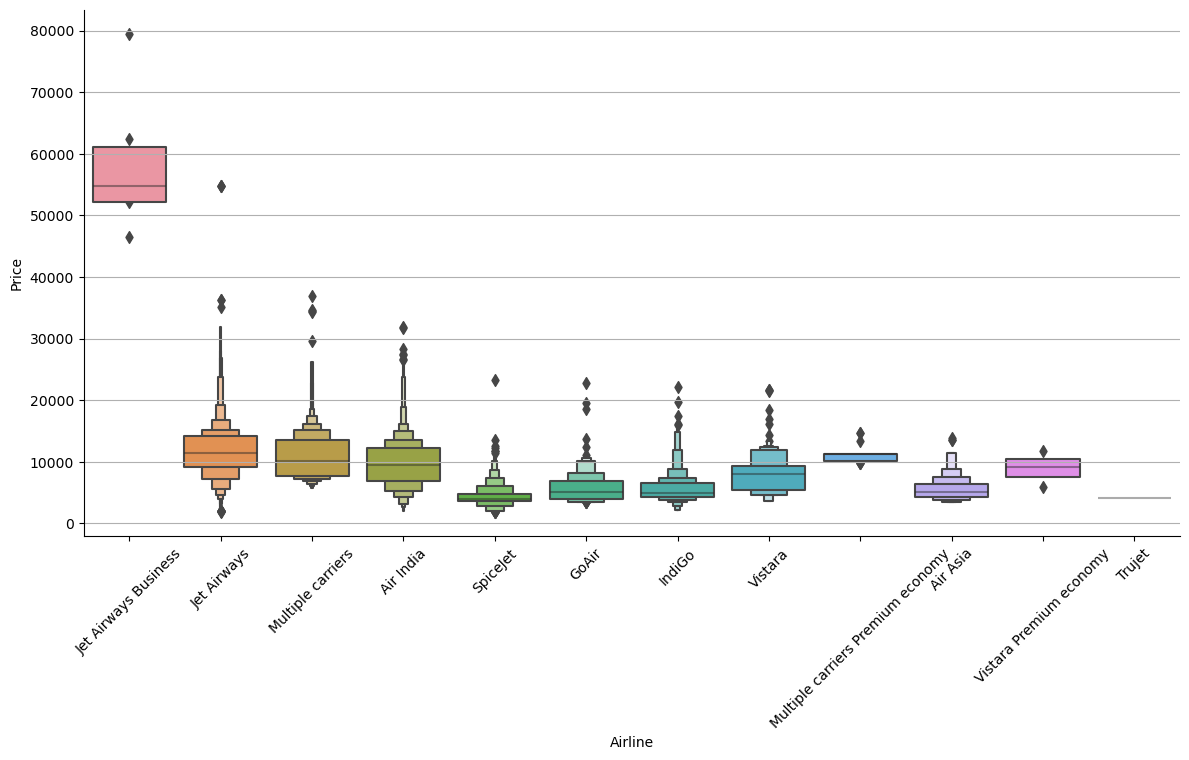

In [20]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),height=6,kind='boxen',aspect=2)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [21]:
airline=train_data[['Airline']]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


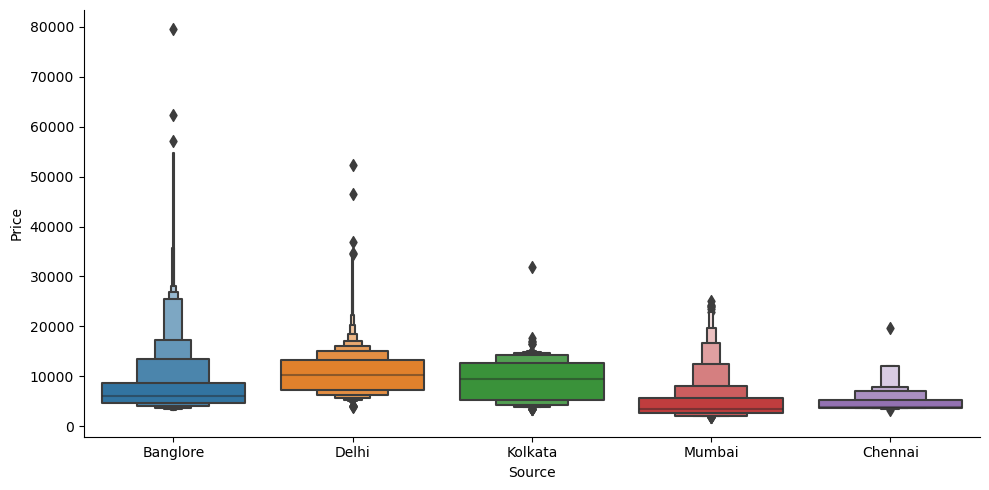

In [22]:
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=2)
plt.show()

In [23]:
source=train_data[['Source']]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


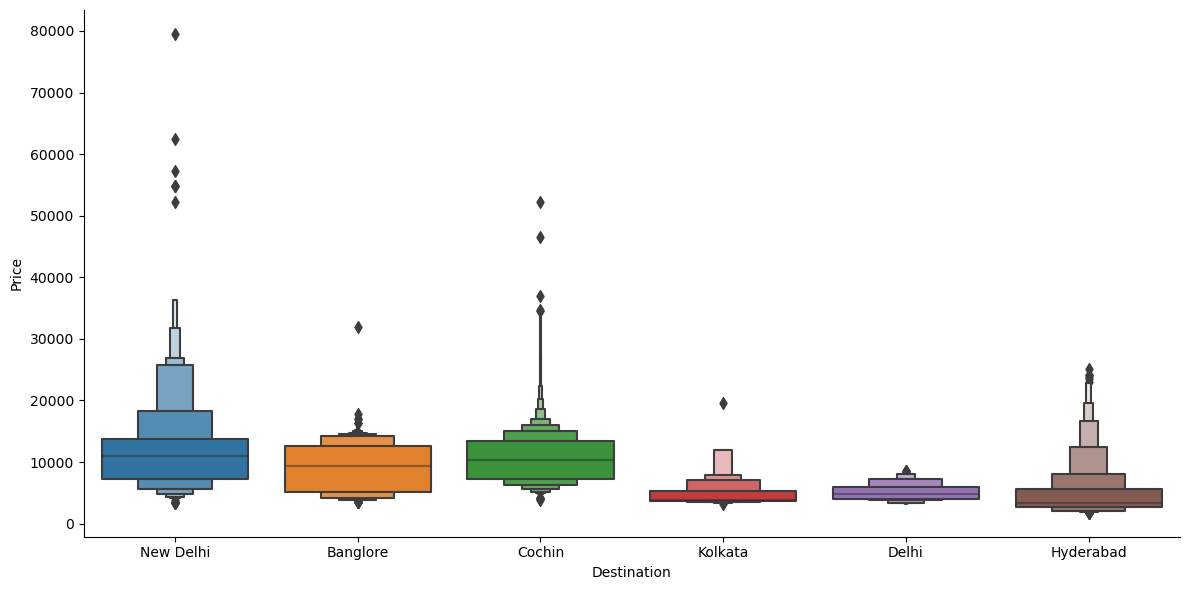

In [24]:
sns.catplot(y='Price',x='Destination',data=train_data,kind='boxen',height=6,aspect=2)
plt.show()

In [25]:
destination=train_data[['Destination']]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [26]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,journey_day,journey_month,Arrival_hour,Arrival_mintue,journey_year
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,3897,24,3,1,10,3
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,7662,1,5,13,15,5
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,13882,9,6,4,25,6
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,6218,12,5,23,30,5
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,13302,1,3,21,35,3


In [27]:
# train_data['Duration']=train_data.Duration.astype('int')
duration=list(train_data['Duration'])
duration_hour=[]
duration_minute=[]
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep="h")[0]))
    duration_minute.append(duration[i].split(sep = "m")[0].split()[-1])
train_data['Duration_hour']=duration_hour
train_data['Duration_minute']=duration_minute

ValueError: invalid literal for int() with base 10: '5m'

In [28]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [29]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [30]:
train_data.drop(['Duration'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,journey_day,journey_month,Arrival_hour,Arrival_mintue,journey_year,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,22:20,non-stop,3897,24,3,1,10,3,2,50
1,Air India,Kolkata,Banglore,05:50,2 stops,7662,1,5,13,15,5,7,25
2,Jet Airways,Delhi,Cochin,09:25,2 stops,13882,9,6,4,25,6,19,0
3,IndiGo,Kolkata,Banglore,18:05,1 stop,6218,12,5,23,30,5,5,25
4,IndiGo,Banglore,New Delhi,16:50,1 stop,13302,1,3,21,35,3,4,45


In [31]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [33]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,journey_day,journey_month,Arrival_hour,Arrival_mintue,journey_year,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,22:20,0,3897,24,3,1,10,3,2,50
1,Air India,Kolkata,Banglore,05:50,2,7662,1,5,13,15,5,7,25
2,Jet Airways,Delhi,Cochin,09:25,2,13882,9,6,4,25,6,19,0
3,IndiGo,Kolkata,Banglore,18:05,1,6218,12,5,23,30,5,5,25
4,IndiGo,Banglore,New Delhi,16:50,1,13302,1,3,21,35,3,4,45


In [34]:
data_train=pd.concat([train_data,airline,source,destination],axis=1)

In [35]:
data_train.drop(['Airline','Destination','Source'],axis=1,inplace=True)

In [36]:
data_train.head()

,Dep_Time,Total_Stops,Price,journey_day,journey_month,Arrival_hour,Arrival_mintue,journey_year,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,22:20,0,3897,24,3,1,10,3,2,50,...,0,0,0,0,0,0,0,0,0,1
1,05:50,2,7662,1,5,13,15,5,7,25,...,0,0,0,1,0,0,0,0,0,0
2,09:25,2,13882,9,6,4,25,6,19,0,...,0,0,1,0,0,1,0,0,0,0
3,18:05,1,6218,12,5,23,30,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,16:50,1,13302,1,3,21,35,3,4,45,...,0,0,0,0,0,0,0,0,0,1


In [37]:
data_train.shape

(10682, 30)

# Test set

In [38]:
test_data=pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
# preprocessing
print('Test data info')
print('-'*75)
print(test_data.info())

print('Null values')
print('-'*75)
print(test_data.dropna(inplace=True))
print()
print()

#EDA

#Date_of_journey
# test_data['journey_day']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
# test_data['journey_year']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.year
# test_data.drop(['Date_of_Journey'],axis=1,inplace=True)
test_data["Journey_day"] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


#Dep_time
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_minute']=pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Dep_Time'],axis=1,inplace=True)

#Arrival_time
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_minute']=pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

#Duration


# duration=list(test_data['Duration'])
# for i in range(len(duration)):
#     if len(duration[i].split()) !=2:
#         if "h" in duration[i]:
#             duration[i]=duration[i].strip()+"0m"
#         else:
#             duration[i]="0h"+duration[i]
# duration_hours=[]
# duration_mins=[]
# for i in range(len(duration)):
#     # duration_hour.append(int(duration[i].split(sep="h")[0]))
#     duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
#     duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

s=pd.to_timedelta(test_data['Duration'])
test_data['hours']=s.dt.components['hours']
test_data['minutes']=s.dt.components['minutes']
    
#Adding duration column to test set
# test_data['duration_hours']=duration_hour
# test_data['duration_minute']=duration_mins
# test_data.drop(['Duration'],axis=1,inplace=True)

#categorical data
print('Airline')
print("-"*75)
print(test_data['Airline'].value_counts())
Airline=pd.get_dummies(test_data['Airline'],drop_first=True)
print()

print('Source')
print('-'*75)
print(test_data['Source'].value_counts())
source=pd.get_dummies(test_data['Source'],drop_first=True)
print()

print('Destination')
print('-'*75)
print(test_data['Destination'].value_counts())
destination=pd.get_dummies(test_data['Destination'],drop_first=True)

#Additional info contains almost 80% no info and also Route
test_data.drop(['Additional_Info','Route'],axis=1,inplace=True)

#Replacing total_stops
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

#concatenate dataframe --> 
data_test=pd.concat([test_data,airline,source,destination],axis=1)

data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

print()
print()

print('Shape of test data: ',data_test.shape)



        


Test data info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Null values
---------------------------------------------------------------------------
None


Airline
---------------------------------------------------------------------------
Jet Airways                        

# Feature selection

In [40]:
data_train.columns

Index(['Dep_Time', 'Total_Stops', 'Price', 'journey_day', 'journey_month',
       'Arrival_hour', 'Arrival_mintue', 'journey_year', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [45]:
x=data_train.loc[:,[ 'Total_Stops',  'journey_day', 'journey_month',
       'Arrival_hour', 'Arrival_mintue', 'journey_year', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,journey_day,journey_month,Arrival_hour,Arrival_mintue,journey_year,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,1,10,3,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,13,15,5,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,4,25,6,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,23,30,5,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,21,35,3,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y=data_train.iloc[:,2]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

C:\Users\unkno\AppData\Local\Temp\ipykernel_16968\961142767.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")


<Axes: >

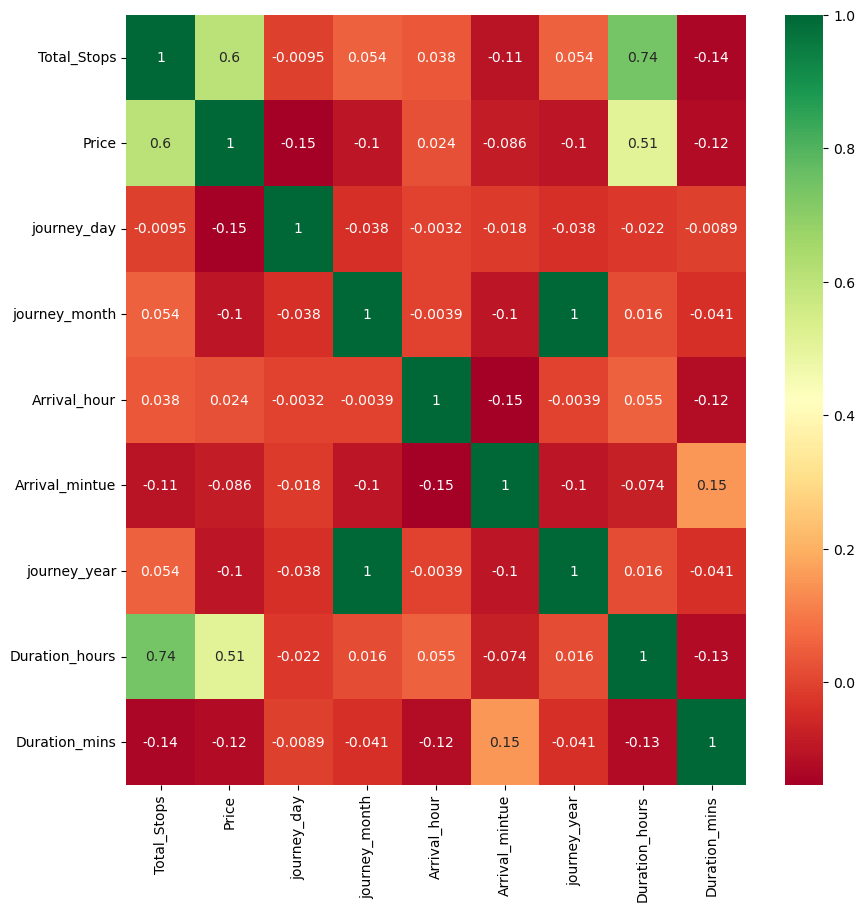

In [47]:
# correlation 
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True,cmap="RdYlGn")

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [49]:
print(selection.feature_importances_)

[2.41510978e-01 1.47995477e-01 2.51945772e-02 3.82392234e-02
 2.50527342e-02 2.66346604e-02 1.29373254e-01 3.18045063e-02
 9.93983260e-03 1.68400034e-03 1.49211639e-02 1.37915938e-01
 6.73595803e-02 2.09221458e-02 8.26146417e-04 2.86237218e-03
 1.14273101e-04 5.27748044e-03 8.09818816e-05 5.56008409e-04
 8.44606856e-03 2.94150300e-03 5.78455494e-03 9.19014598e-03
 1.31774205e-02 7.04752418e-03 5.49169459e-04 2.45982793e-02]


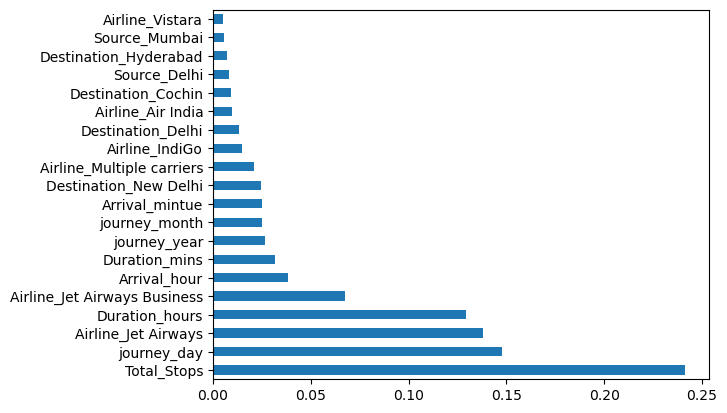

In [50]:
#plot graph of feature importance for better visulaization
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [57]:
y_pred=reg_rf.predict(x_test)

In [58]:
reg_rf.score(x_train,y_train)

0.9547370218628181

In [59]:
reg_rf.score(x_test,y_test)

0.7752266936796385

C:\Users\unkno\AppData\Local\Temp\ipykernel_16968\1233333027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


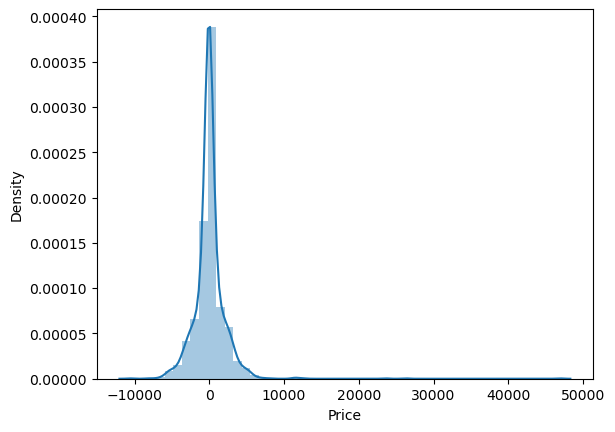

In [61]:
sns.distplot(y_test-y_pred)
plt.show();

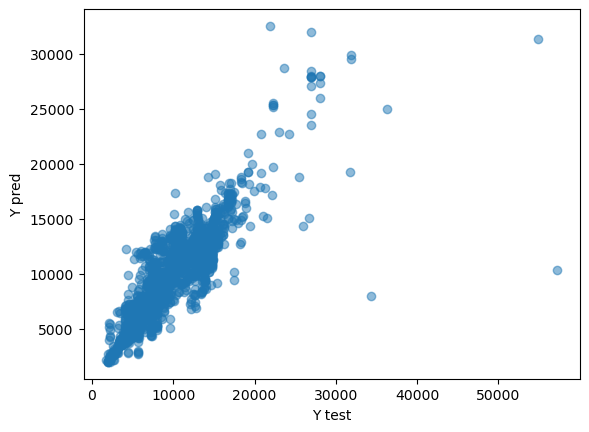

In [62]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [63]:
from sklearn import metrics

In [65]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE 1210.2233866072313
MSE 4999658.310390908
RMSE 2235.991572075107


In [66]:
metrics.r2_score(y_test,y_pred)

0.7752266936796385

# Hyperparametrer Turning



In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=100)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=5)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [75]:
random_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [87]:
rf_random = RandomizedSearchCV(estimator = reg_rf, 
    param_distributions = random_grid,scoring='neg_mean_squared_error',
    n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 1)


In [88]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1155; total time=   8.7s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1155; total time=   6.2s
[CV] END max_depth=23, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1155; total time=   5.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=766; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=766; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=766; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   0.0s
[CV] END max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_es

c:\Users\unkno\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\unkno\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\unkno\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\unkno\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\unkno\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200, 211, 222,
                                                         233, 244, 255, 266,
                                                         277, 288, 300, 311,
                                                         322, 333, 344, 355,
                                                         366, 377, 388, 400,
                                                         411, 422, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [89]:
prediction=rf_random.predict(x_test)

C:\Users\unkno\AppData\Local\Temp\ipykernel_16968\3354484248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


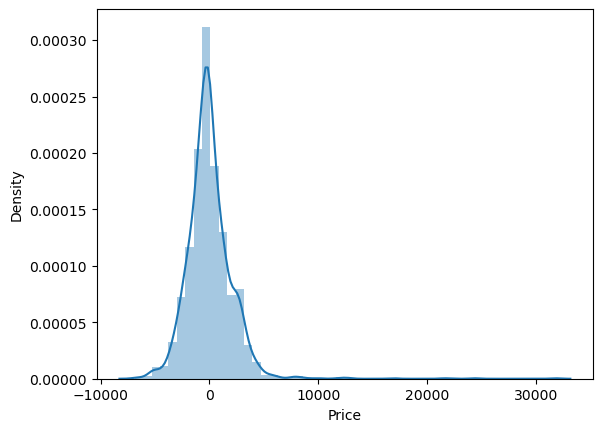

In [92]:
sns.distplot(y_test-prediction)
plt.show()

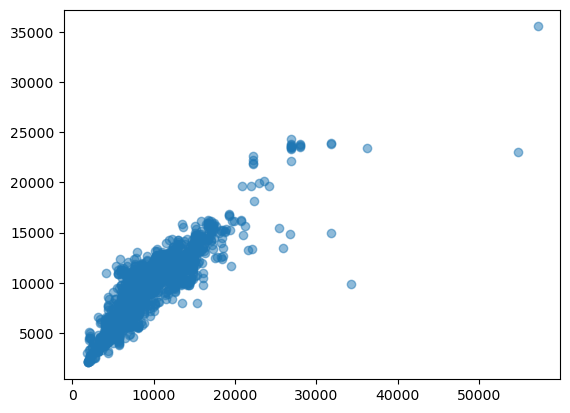

In [94]:
plt.scatter(y_test,prediction,alpha=0.5)

In [95]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1433.0264061928872
MSE: 4726504.443234172
RMSE: 2174.0525392074064


In [96]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [98]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [99]:
y_prediction=forest.predict(x_test)

In [100]:
metrics.r2_score(y_test,y_prediction)

0.7752266936796385